# Shiuli Subhra Ghosh(MDS202035), Suman Roy(MDS202041)

# Manual Network for Parity Checker (Input Layer, one hidden layer, Output Layer)

## Date: 19.11.2021

In [3]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

### Activation Function

Here, we have taken the sigmoid activation function with thresholding for each neurons at each layer.

The sigmoid function takes range in between 0 and 1. 

So, we already know that,  $\sigma(z) = \frac{1}{1+\exp(-z)}$
But, the activation function we used here is, 

 $$ activation(z)=   \left\{
\begin{array}{ll}
      1 & \sigma(z)>0.5 \\
      0 & \sigma(z) <= 0.5\\
\end{array} 
\right.  $$


In [12]:
def activation(z):
    t = 1 / (1 + np.exp(-z))
    a = t > 0.5
    return (a.astype(int))

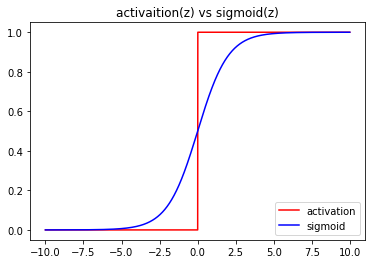

In [13]:
l = np.arange(-10, 10, 0.01)
y = 1 / (1 + np.exp(-l))
y1 = activation(l)
plt.plot(l,y1,'r')
plt.plot(l,y,'b')
plt.title('activaition(z) vs sigmoid(z)')
plt.legend(['activation','sigmoid'], loc = 'lower right')
plt.show()

### Forward Propagation function (Implemented vectorised implementation in numpy) 

In [14]:
def forwardPropagation(x,W1,b1,W2,b2):
    Z1 = np.dot(W1, x) + b1
    A1 = activation(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = activation(Z2)
    return A2

### Data Loading and Denifing Manual Weight and Bias Matrix for any 2n Bit Parity Checker

Explanation of the methos used to determine the weight and bias manually.

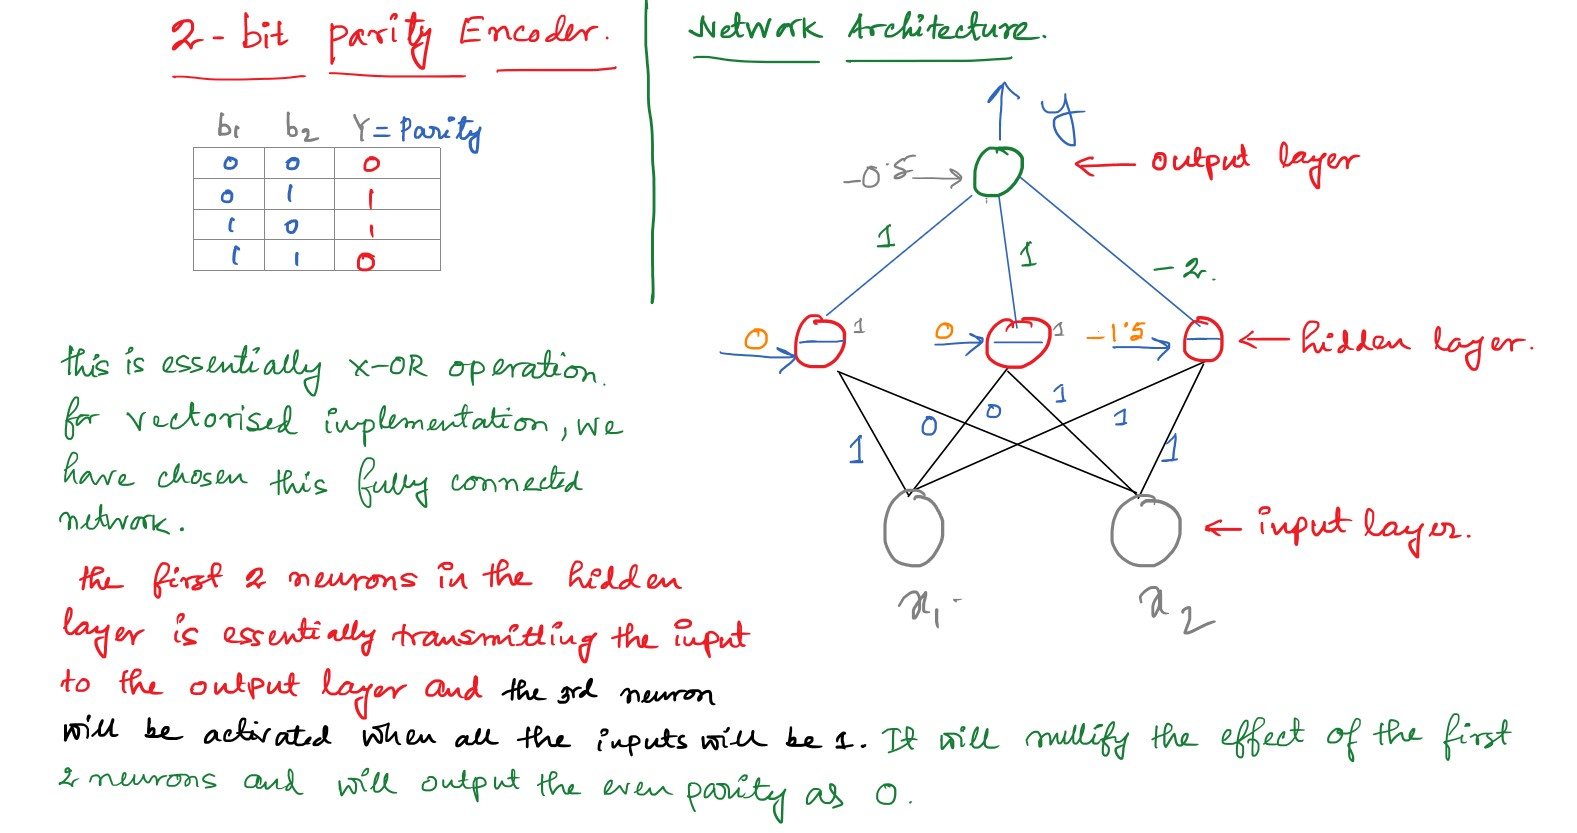

Explanation of extending it to 2n bits, 

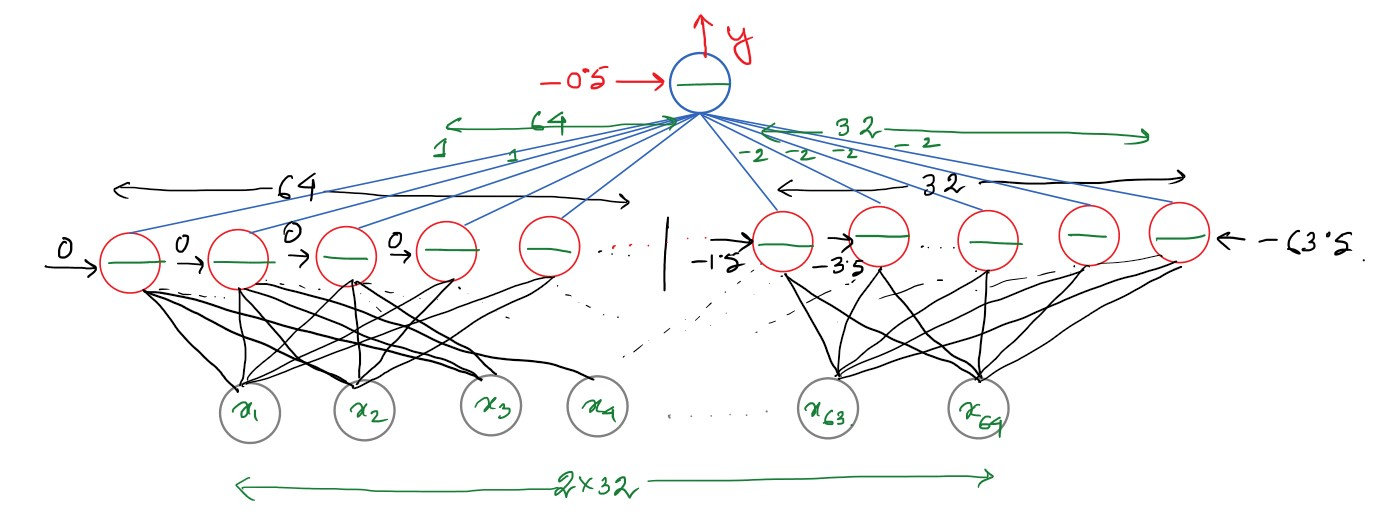

For this implementation, last n neurons from the first hidden layer is nullyfying the extra effect of all the neurons.

In [15]:
class Manual_Parity_checker:
    # load the dataset
    def __init__(self, file_name):
        # load the csv file as a dataframe
        self.df = pd.read_csv(file_name, header=0, index_col = 0)
        # store the inputs and outputs
        self.X = self.df.values[:, :-1]
        self.y = self.df.values[:, -1].reshape(len(self.X),1)
        # ensure input data is floats
        self.X = self.X.astype('float32')
        # label encode target and ensure the values are floats
        self.y = LabelEncoder().fit_transform(self.y)
        self.y = self.y.astype('float32')
        self.y = self.y.reshape((len(self.y), 1))
        self.n = self.X.shape[1]
        self.W1 = 0
        self.W2 = 0
        self.b1 = 0
        self.b2 = 0
        
    def data_split(self):
        return(self.X, self.y,self.df)
        
    def weight_bias_matrix(self):
        
        ## Weight of the first hidden layer
        W1_i = np.identity(self.n)
        W1_ones = np.ones((self.n//2,self.n))
        self.W1 = np.concatenate((W1_i,W1_ones), axis = 0)
        
        ## Bias of the first hidden layer
        b1_i = np.zeros((self.n,1))
        b = np.array([-1.5-(i) for i in range(0,self.n,2)]).reshape((self.n//2,1))
        self.b1 = np.concatenate((b1_i,b), axis = 0)
        
        ## Weight of the second layer (Output layer)
        W2_i = np.ones((1,self.n))
        W2_ones = -2*np.ones((1,self.n//2))
        self.W2 = np.concatenate((W2_i , W2_ones), axis = 1)
        
        ## Bias of the second layer (Output layer)
        self.b2 = -0.5
        
        return(self.W1,self.b1,self.W2,self.b2)


Like wise from this code, we got the weight and bias matrices,

$W_{1} = \begin{pmatrix} 1 & 0 & 0 & \dots & 0 \\ 0 & 1 & 0 & \dots & 0 \\ \vdots & \vdots & \ddots & \ddots & \vdots \\ 0 & 0 & 0 & \dots & 1 \\ 1 & 1 & 1 & \dots & 1 \\ 1 & 1 & 1 & \dots & 1\end{pmatrix}_{(96 \times 64)}$
$b_{1} = \begin{pmatrix} 0 \\ 0 \\ \vdots \\ 0 \\ -1.5 \\ -3.5 \\ \vdots\\ -63.5 \end{pmatrix}_{(96 \times 1)}  $
$W_{2} = \begin{pmatrix} 1 & 1 & \dots & 1 & -2 & -2 & \dots & -2 \end{pmatrix}_{(1 \times 96)}$
$b_{2} = -0.5$

# Performance Evaluation

In [16]:
class performance:
    def __init__(self,file_name):
        self.file_name = file_name
        parity = Manual_Parity_checker(self.file_name)
        self.X,self.y,self.df = parity.data_split()
        self.W1,self.b1,self.W2,self.b2 = parity.weight_bias_matrix()
        self.y_pred = []
        self.tn = 0
        self.fp = 0
        self.fn = 0
        self.tp = 0
        
        
    def train_prediction(self):
        for i in range(len(self.X)):
            t = forwardPropagation(self.X[i].reshape(self.X.shape[1],1),self.W1,self.b1,self.W2,self.b2)
            self.y_pred.append(t)
            
        self.y_pred = np.array(self.y_pred).reshape(len(self.X),1)    
        self.df['y_pred'] = self.y_pred
        
        return(self.y_pred,self.df)
    
    def con_matrix(self):
        self.tn, self.fp, self.fn, self.tp = confusion_matrix(self.y,self.y_pred).ravel()
        
        return(confusion_matrix(self.y,self.y_pred), self.tn,self.fp,self.fn,self.tp)
    
    def accuracy(self):
        return((self.tn + self.tp)/(self.tn+self.tp+self.fp+self.fn) * 100)

### Driver Code

### Data Set 'gen2000.csv'

In [17]:
file_name = 'gen2000.csv'
model = Manual_Parity_checker(file_name)    
X,y,df = model.data_split()        
W1,b1,W2,b2 = model.weight_bias_matrix()           

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [18]:
per = performance(file_name)
y_pred, df_pred = per.train_prediction()  
confusion,tn,fp,fn,tp = per.con_matrix()
accuracy = per.accuracy() 

In [19]:
df_pred[['Y','y_pred']]

,Y,y_pred
0,0,0
1,0,0
2,1,1
3,1,1
4,0,0
...,...,...
2045,1,1
2046,0,0
2047,0,0
2048,0,0


In [20]:
print('The accuracy is: ', accuracy , '%')

The accuracy is:  100.0 %


### Data Set 'gen5000.csv'

In [22]:
file_name = 'gen5000.csv'
model = Manual_Parity_checker(file_name)    
X,y,df = model.data_split()        
W1,b1,W2,b2 = model.weight_bias_matrix()  

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [23]:
per = performance(file_name)
y_pred, df_pred = per.train_prediction()  
confusion,tn,fp,fn,tp = per.con_matrix()
accuracy = per.accuracy() 

In [24]:
df_pred[['Y','y_pred']]

,Y,y_pred
0,0,0
1,0,0
2,1,1
3,1,1
4,0,0
...,...,...
5045,0,0
5046,0,0
5047,0,0
5048,0,0


In [25]:
print('The accuracy is: ', accuracy , '%')

The accuracy is:  100.0 %


Comparing this manual implementation with the DNN we can see a significant difference in accuracy, because we have used one deterministic method to obtain the solution. But in our DNN it is learning from the training examples. That is why the accuracy can't be achieved as it is achieved in case of manual implementation.